In [1]:
# CHENGZHI DONG
# ID 112890166
# CSE 353 
# Assignment 2

In [2]:
import numpy as  np
import matplotlib.pyplot as plt
import random

In [3]:
# data folder directory
dataFolder = "data/"

In [4]:
# Sign function for wTx
def sign(w, x):
    w_transpose = np.transpose(w)
    result = np.matmul(w, x)
    if(result < 0):
        return -1
    elif(result > 0):
        return 1
    else:
        return 0

In [5]:
# Count the number of error with given w, x, y
def count_error (w, x_data, y_data):
    err = 0
    for n in range(len(x_data)):
        if(sign(w,x_data[n]) != y_data[n]):
            err += 1
    return err

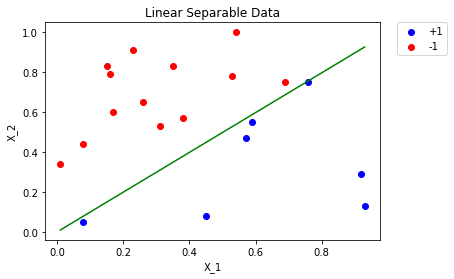

Decision Boundary for Linear Separable Data = [ 0.    2.84 -2.85]
Number of Error for Linear Separable Data: 0
Error Rate for Linear Separable Data: 0.0


In [6]:
# Part1: linear separable data

# Load the data
x_linear_separable = np.loadtxt(dataFolder+"X_LinearSeparable.txt", delimiter = ',')
y_linear_separable = np.loadtxt(dataFolder+"Y_LinearSeparable.txt", delimiter = ',')

# Determine data size
xSize = len(x_linear_separable)
sampleSize = len(y_linear_separable)

# All points stored in x_data
x_data = np.zeros((sampleSize, xSize))

# Arrays for plotting
x1_pos = np.array([])
x1_neg = np.array([])
x2_pos = np.array([])
x2_neg = np.array([])

# Find the x1 and x2 values for the two end points of the decision boundary line for visualization
x1_min = x_linear_separable[1][0]
x1_max = x_linear_separable[1][0]
x2_min = x_linear_separable[2][0]
x2_max = x_linear_separable[2][0]

# Loop over the data
for s in range(sampleSize):
    
    # Store every point into x_data array
    for x in range(xSize):        
        x_data[s][x] = x_linear_separable[x][s]
    
    # Find the min and max of x1 and x2 for plotting the decision boundary line
    if x1_min > x_linear_separable[1][s]:
        x1_min = x_linear_separable[1][s]
    if x1_max < x_linear_separable[1][s]:
        x1_max = x_linear_separable[1][s]
    if x2_min > x_linear_separable[2][s]:
        x2_min = x_linear_separable[2][s]
    if x2_max < x_linear_separable[2][s]:
        x2_max = x_linear_separable[2][s]
    
    # Create positive and negative arrays for x1 and x2 for plotting
    if(y_linear_separable[s] > 0):
        x1_pos = np.append(x1_pos, [x_linear_separable[1][s]])
        x2_pos = np.append(x2_pos, [x_linear_separable[2][s]])      
    else:
        x1_neg = np.append(x1_neg, [x_linear_separable[1][s]])
        x2_neg = np.append(x2_neg, [x_linear_separable[2][s]])

# Initialize w_0
w_ls = np.zeros((xSize))

# Create a list of loop order
random_order = np.arange(0, sampleSize)

# PLA
while True:
    
    # Check data with random order to find error
    random.shuffle(random_order)
    error_flag = False
    for i in random_order:
        if(sign(w_ls, x_data[i]) != y_linear_separable[i]):
            w_ls = np.add(w_ls, np.multiply(y_linear_separable[i], x_data[i]))
            error_flag = True
            break
            
    # If no error was found, it is done     
    if not error_flag:
        break


# To avoid divide by zero problem        
if(w_ls[2] != 0):
    
    # Find the x2 values for the two end points of the decision boundary line for visualization
    x2_min = ( 0 - ( w_ls[0] + w_ls[1] * x1_min ) ) / w_ls[2]
    x2_max = ( 0 - ( w_ls[0] + w_ls[1] * x1_max ) ) / w_ls[2]

    # Visualization
    plt.title("Linear Separable Data")
    plt.scatter(x1_pos, x2_pos, color='blue', label="+1") 
    plt.scatter(x1_neg, x2_neg, color='red', label="-1")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "green")
    plt.show()
    
else:
    
    # Visualization
    plt.title("Linear Separable Data")
    plt.scatter(x1_pos, x2_pos, color='blue', label="+1") 
    plt.scatter(x1_neg, x2_neg, color='red', label="-1")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.vlines(-w_ls[0]/w_ls[1], x2_min, x2_max, color = "green")
    plt.show()

# Calculate the error rate of the decision boundary
error = count_error(w_ls, x_data, y_linear_separable)
error_rate = error/sampleSize

print("Decision Boundary for Linear Separable Data = " + str(w_ls))
print("Number of Error for Linear Separable Data: " + str(error))
print("Error Rate for Linear Separable Data: " + str(error_rate))

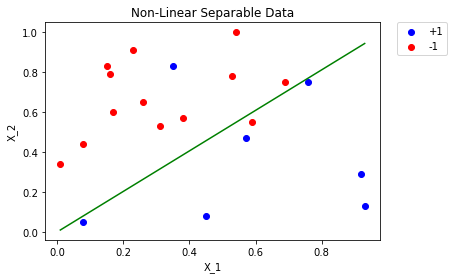

Decision Boundary for Non-Linear Separable Data = [ 0.    1.33 -1.31]
Number of Error for Non-Linear Separable Data: 2
Error Rate for Non-Linear Separable Data: 0.1


In [7]:
# Part2: noisy data test
# Load the Data
x_noisy_data = np.loadtxt(dataFolder+"X_NonLinearSeparable.txt", delimiter = ',')
y_noisy_data = np.loadtxt(dataFolder+"Y_NonLinearSeparable.txt", delimiter = ',')

# Determine data size
xSize = len(x_noisy_data)
sampleSize = len(y_noisy_data)

# All points stored in x_data
x_data = np.zeros((sampleSize, xSize))

# Arrays for plotting
x1_pos = np.array([])
x1_neg = np.array([])
x2_pos = np.array([])
x2_neg = np.array([])

# Find the x1 values for the two end points of the decision boundary line for visualization
x1_min = x_noisy_data[1][0]
x1_max = x_noisy_data[1][0]
x2_min = x_noisy_data[2][0]
x2_max = x_noisy_data[2][0]

# Loop over the data
for s in range(sampleSize):

    # Store every point into x_data array
    for x in range(xSize):        
        x_data[s][x] = x_noisy_data[x][s]

    # Find the min and max of x1 for plotting the decision boundary line
    if x1_min > x_noisy_data[1][s]:
        x1_min = x_noisy_data[1][s]
    if x1_max < x_noisy_data[1][s]:
        x1_max = x_noisy_data[1][s]
    if x2_min > x_noisy_data[2][s]:
        x2_min = x_noisy_data[2][s]
    if x2_max < x_noisy_data[2][s]:
        x2_max = x_noisy_data[2][s]

    # Create positive and negative arrays for x1 and x2 for plotting
    if(y_noisy_data[s] > 0):
        x1_pos = np.append(x1_pos, [x_noisy_data[1][s]])
        x2_pos = np.append(x2_pos, [x_noisy_data[2][s]])
    else:
        x1_neg = np.append(x1_neg, [x_noisy_data[1][s]])
        x2_neg = np.append(x2_neg, [x_noisy_data[2][s]])

# Initialize best w and temp w
w_nd = np.zeros((xSize))
w_temp = np.zeros((xSize))

# Create a list of loop order
random_order = np.arange(0,sampleSize)

# Count initial number of error
min_error = count_error(w_nd, x_data, y_noisy_data)
current_error = count_error(w_temp, x_data, y_noisy_data)

# Pocket PLA
for t in range(1000):
    
    # Check data with random order to find error
    random.shuffle(random_order)
    for i in random_order:
        
        # Finding the error with temp w
        if sign(w_temp, x_data[i]) != y_noisy_data[i]:
            w_temp = np.add(w_temp, np.multiply(y_noisy_data[i], x_data[i]))

            # Count the number of errors with temp w
            current_error = count_error(w_temp, x_data, y_noisy_data)
        
            # If temp w is better than the pocket w_nd, update best w and minimum error number
            if current_error < min_error:
                w_nd = np.copy(w_temp)
                min_error = current_error
    # If there are no error, it is done
    if min_error == 0:
        break

# To avoid divide by zero problem  
if(w_nd[2] != 0):
    # Find the x2 values for the two end points of the decision boundary line for visualization
    x2_min = ( 0 - ( w_nd[0] + w_nd[1] * x1_min ) ) / w_nd[2]
    x2_max = ( 0 - ( w_nd[0] + w_nd[1] * x1_max ) ) / w_nd[2]

    # Visualization
    plt.title("Non-Linear Separable Data")
    plt.scatter(x1_pos, x2_pos, color='blue', label="+1") 
    plt.scatter(x1_neg, x2_neg, color='red', label="-1")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "green")
    plt.show()

else:
    
    # Visualization
    plt.title("Non-Linear Separable Data")
    plt.scatter(x1_pos, x2_pos, color='blue', label="+1") 
    plt.scatter(x1_neg, x2_neg, color='red', label="-1")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.vlines(-w_nd[0]/w_nd[1], x2_min, x2_max, color = "green")
    plt.show()

# Calculate the error rate of the decision boundary
error = count_error(w_nd, x_data, y_noisy_data)
error_rate = error/sampleSize
print("Decision Boundary for Non-Linear Separable Data = " + str(w_nd))
print("Number of Error for Non-Linear Separable Data: " + str(error))
print("Error Rate for Non-Linear Separable Data: " + str(error_rate))

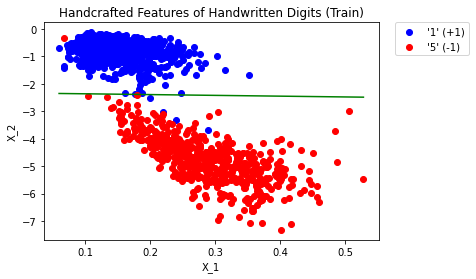

Decision Boundary from Training Data of Digit Handcrafted Features = [9.     1.1094 3.8603]
Number of Error for Digit Handcrafted Features Data (Train): 5
Error Rate for Digit Handcrafted Features Data (Train): 0.0032030749519538757


In [8]:
# Part 3: handcrafted features of handwritten digits

# Load the Training Data
x_handcraft_train = np.loadtxt(dataFolder+"X_Digits_HandcraftedFeature_Train.txt", delimiter = ',')
y_handcraft_train = np.loadtxt(dataFolder+"Y_Digits_HandcraftedFeature_Train.txt", delimiter = ',')

# Determine data size
xSize = len(x_handcraft_train)
sampleSize = len(y_handcraft_train)

# All points stored in x_data
x_data = np.zeros((sampleSize, xSize))

# Arrays for plotting
x1_pos = np.array([])
x1_neg = np.array([])
x2_pos = np.array([])
x2_neg = np.array([])

# Find the x1 and x2 values for the two end points of the decision boundary line for visualization
x1_min = x_handcraft_train[1][0]
x1_max = x_handcraft_train[1][0]
x2_min = x_handcraft_train[2][0]
x2_max = x_handcraft_train[2][0]

# Loop over the data
for s in range(sampleSize):
    
    # Store every point into x_data array
    for x in range(xSize):        
        x_data[s][x] = x_handcraft_train[x][s]
        
    # Find the min and max of x1 and x2 for plotting the decision boundary line
    if x1_min > x_handcraft_train[1][s]:
        x1_min = x_handcraft_train[1][s]
    if x1_max < x_handcraft_train[1][s]:
        x1_max = x_handcraft_train[1][s]
    if x2_min > x_handcraft_train[2][s]:
        x2_min = x_handcraft_train[2][s]
    if x2_max < x_handcraft_train[2][s]:
        x2_max = x_handcraft_train[2][s]

    # Create positive and negative arrays for x1 and x2 for plotting
    if(y_handcraft_train[s] > 0):
        x1_pos = np.append(x1_pos, [x_handcraft_train[1][s]])
        x2_pos = np.append(x2_pos, [x_handcraft_train[2][s]])
    else:
        x1_neg = np.append(x1_neg, [x_handcraft_train[1][s]])
        x2_neg = np.append(x2_neg, [x_handcraft_train[2][s]])
        
# Initialize the best w (w_hc) and temp w
w_hc = np.zeros((xSize))
w_temp = np.zeros((xSize))

# Create a list of loop order
random_order = np.arange(0, sampleSize)

# Count initial number of error
min_error = count_error(w_hc, x_data, y_handcraft_train)
current_error = count_error(w_temp, x_data, y_handcraft_train)

# Pocket PLA
for t in range(1000):
    
    # Check data with random order to find error
    random.shuffle(random_order)
    for i in random_order:
        
        # If found an error with temp w, fix the error by w_temp + y[i] * x[i]
        if sign(w_temp, x_data[i]) != y_handcraft_train[i]:
            w_temp = np.add(w_temp, np.multiply(y_handcraft_train[i], x_data[i]))

            # Count the number of errors with temp w
            current_error = count_error(w_temp, x_data, y_handcraft_train)

            # If temp w is better than w_hc, update w_hc and minimum error number
            if current_error <  min_error:
                w_hc = w_temp
                min_error = current_error
    
    # If there are no error, it is done
    if min_error == 0:
        break

# To avoid divide by zero problem  
if(w_hc[2] != 0):
    
    # Find the x2 values for the two end points of the decision boundary line for visualization
    x2_min = ( 0 - ( w_hc[0] + w_hc[1] * x1_min ) ) / w_hc[2]
    x2_max = ( 0 - ( w_hc[0] + w_hc[1] * x1_max ) ) / w_hc[2]

    # Visualization
    plt.title("Handcrafted Features of Handwritten Digits (Train)")
    plt.scatter(x1_pos, x2_pos, color='blue', label="\'1\' (+1)") 
    plt.scatter(x1_neg, x2_neg, color='red', label="\'5\' (-1)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "green")
    plt.show()

else:
    
    # Visualization
    plt.title("Handcrafted Features of Handwritten Digits (Train)")    
    plt.scatter(x1_pos, x2_pos, color='blue', label="\'1\' (+1)") 
    plt.scatter(x1_neg, x2_neg, color='red', label="\'5\' (-1)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.vlines(-w_hc[0]/w_hc[1], x2_min, x2_max, color = "green")
    plt.show()


# Calculate the error rate of the decision boundary for the training data
error = count_error(w_hc, x_data, y_handcraft_train)
error_rate = error/sampleSize

print("Decision Boundary from Training Data of Digit Handcrafted Features = " + str(w_hc))
print("Number of Error for Digit Handcrafted Features Data (Train): " + str(error))
print("Error Rate for Digit Handcrafted Features Data (Train): " + str(error_rate))

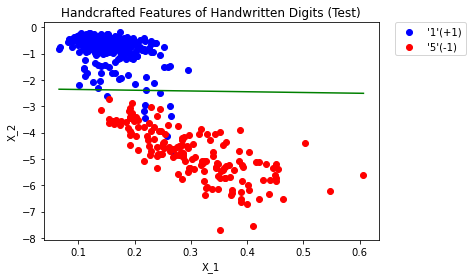

Decision Boundary from Training Data of Digit Handcrafted Features = [9.     1.1094 3.8603]
Number of Error for Digit Handcrafted Features Data (Test): 9
Error Rate for Digit Handcrafted Features Data (Test): 0.02122641509433962


In [9]:
# # Part 3: handcrafted features of handwritten digits
# # Testing Part
# Load the Testing Data
x_handcraft_test = np.loadtxt(dataFolder+"X_Digits_HandcraftedFeature_Test.txt", delimiter = ',')
y_handcraft_test = np.loadtxt(dataFolder+"Y_Digits_HandcraftedFeature_Test.txt", delimiter = ',')

# Determine data size
xSize = len(x_handcraft_test)
sampleSize = len(y_handcraft_test)

x_data = np.zeros((sampleSize, xSize))

# Arrays for plot testing data
x1_pos = np.array([])
x1_neg = np.array([])
x2_pos = np.array([])
x2_neg = np.array([])


# Find the x1 values for the two end points of the decision boundary line for visualization
x1_min = x_handcraft_test[1][0]
x1_max = x_handcraft_test[1][0]
x2_min = x_handcraft_test[2][0]
x2_max = x_handcraft_test[2][0]

for s in range(sampleSize):
    
    # Store every point into x_data array
    for x in range(xSize):        
        x_data[s][x] = x_handcraft_test[x][s]
    
    # find the min and max of x1 for plot the boundary line
    if x1_min > x_handcraft_test[1][s]:
        x1_min = x_handcraft_test[1][s]
    if x1_max < x_handcraft_test[1][s]:
        x1_max = x_handcraft_test[1][s]
        
    if x2_min > x_handcraft_test[2][s]:
        x2_min = x_handcraft_test[2][s]
    if x2_max < x_handcraft_test[2][s]:
        x2_max = x_handcraft_test[2][s]

    # create positive and negative array for x1 and x2 for plotting
    if(y_handcraft_test[s] > 0):
        x1_pos = np.append(x1_pos, [x_handcraft_test[1][s]])
        x2_pos = np.append(x2_pos, [x_handcraft_test[2][s]])

    else:
        x1_neg = np.append(x1_neg, [x_handcraft_test[1][s]])
        x2_neg = np.append(x2_neg, [x_handcraft_test[2][s]])

# To avoid divide by zero problem  
if(w_hc[2] != 0):
    
    # Find the x2 values for the two end points of the decision boundary line for visualization
    x2_min = ( 0 - ( w_hc[0] + w_hc[1] * x1_min ) ) / w_hc[2]
    x2_max = ( 0 - ( w_hc[0] + w_hc[1] * x1_max ) ) / w_hc[2]

    # Visualization
    plt.title("Handcrafted Features of Handwritten Digits (Test)")
    plt.scatter(x1_pos, x2_pos, color='blue', label="\'1\'(+1)") 
    plt.scatter(x1_neg, x2_neg, color='red', label="\'5\'(-1)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.plot([x1_min, x1_max], [x2_min, x2_max], color = "green")
    plt.show()

else:
    
    # Visualization
    plt.title("Handcrafted Features of Handwritten Digits (Test)")
    plt.scatter(x1_pos, x2_pos, color='blue', label="\'1\' (+1)") 
    plt.scatter(x1_neg, x2_neg, color='red', label="\'5\' (-1)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("X_1")
    plt.ylabel("X_2")
    plt.vlines(-w_hc[0]/w_hc[1], x2_min, x2_max, color = "green")
    plt.show()


# Calculate the error rate of the decision boundary for the testing data
error = count_error(w_hc, x_data, y_handcraft_test)
error_rate = error/sampleSize
print("Decision Boundary from Training Data of Digit Handcrafted Features = " + str(w_hc))
print("Number of Error for Digit Handcrafted Features Data (Test): " + str(error))
print("Error Rate for Digit Handcrafted Features Data (Test): " + str(error_rate))

In [10]:
# Part 4 : Raw Data
# Training Part

# Load the Train Data
x_raw_train = np.loadtxt(dataFolder+"X_Digits_RawFeature_Train.txt", delimiter = ',')
y_raw_train = np.loadtxt(dataFolder+"Y_Digits_RawFeature_Train.txt", delimiter = ',')

# Determine data size
xSize = len(x_raw_train)
sampleSize = len(y_raw_train)

# All points stored in x_data
x_data = np.zeros((sampleSize, xSize))

# Loop over the training data
for s in range(sampleSize):
    
    # Store every point into x_data array
    for x in range(xSize):        
        x_data[s][x] = x_raw_train[x][s]
        
# Initialize the best w (w_rd) and temp w
w_rd = np.zeros((xSize))
w_temp = np.zeros((xSize))

# Create a list of loop order
random_order = np.arange(0,sampleSize)

# Count the initial number of error of w_rd and temp w
min_error = count_error(w_rd, x_data, y_raw_train)
current_error = count_error(w_temp, x_data, y_raw_train)

# Pocket PLA
for t in range(1000):
    
    # Check data with random order to find error
    random.shuffle(random_order)
    for i in random_order:
        
        # If found an error with temp w, fix the error by w_temp + y[i] * x[i]
        if(sign(w_temp, x_data[i]) != y_raw_train[i]):
            w_temp = np.add(w_temp, np.multiply(y_raw_train[i], x_data[i]))

            # Count the number of errors with w_temp
            current_error = count_error(w_temp, x_data, y_raw_train)

            # If temp w is better than w_rd, update w_rd and min erro
            if current_error < min_error:
                w_rd = w_temp
                min_error = current_error
                
    # If there are no error, done and break the iteration
    if min_error == 0:
        break
                
# Calculate the error rate of the decision boundary

error = count_error(w_rd, x_data, y_raw_train)
error_rate = error/sampleSize
#print("Decision Boundary from Train Raw Data = " + str(w_rd))
print("Number of Error for Raw Data (Train): " + str(error))
print("Error Rate for Raw Data (Train): " + str(error_rate))

Number of Error for Raw Data (Train): 0
Error Rate for Raw Data (Train): 0.0


In [11]:
# Part 4 : Raw Data
# Testing Part

# Load the Test Data
x_raw_test = np.loadtxt(dataFolder+"X_Digits_RawFeature_Test.txt", delimiter = ',')
y_raw_test = np.loadtxt(dataFolder+"Y_Digits_RawFeature_Test.txt", delimiter = ',')

# Determine data size
xSize = len(x_raw_test)
sampleSize = len(y_raw_test)

# All points stored in x_data
x_data = np.zeros((sampleSize, xSize))

# Loop over the testing data
for s in range(sampleSize):
    
    # Store every data into x_data array
    for x in range(xSize):        
        x_data[s][x] = x_raw_test[x][s]

# Calculate the error rate of the decision boundary
error = count_error(w_rd, x_data, y_raw_test)
error_rate = error/sampleSize
#print("Decision Boundary from Train Raw Data = " + str(w_rd))
print("Number of Error for Raw Data (Test): " + str(error))
print("Error Rate for Raw Data (Test): " + str(error_rate))

Number of Error for Raw Data (Test): 4
Error Rate for Raw Data (Test): 0.009433962264150943
